# Assignment 1
This file covers the solutions to the 4 questions on assignment 1.
1. Generate samples using a given covariance matrix.
2. Create decision boundaries giving class priors.
3. Implement the PCA dimensionality reduction technqiue.
4. Implement the kNN classifier.

In [1]:
# Import Packages
import numpy as np
import scipy.linalg as sl
import matplotlib.pyplot as plt

## Question 1 - Covariance Matrix A

In [197]:
n = 1000
d = 2

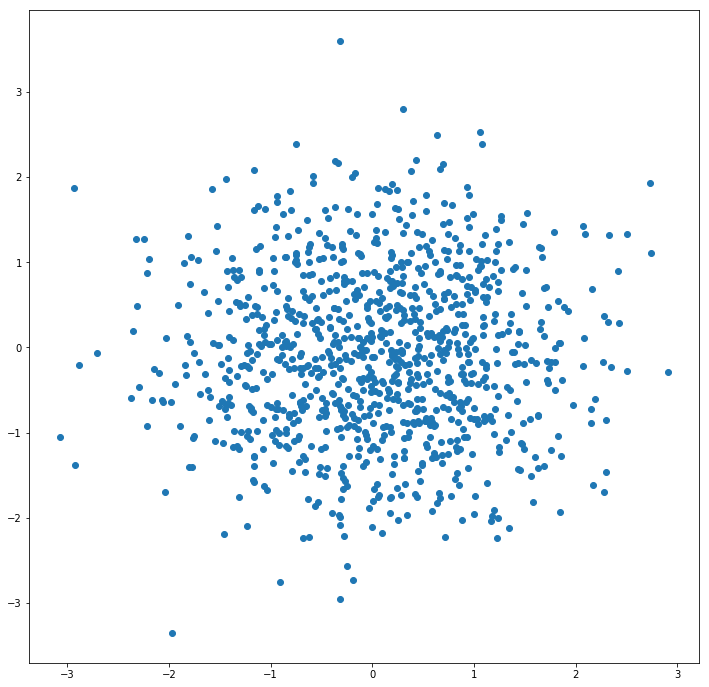

In [198]:
# part a
covariance = np.array([[1, 0],[0, 1]])
np.random.seed(2048)
Y = np.random.randn(n, d)
chol_cov = np.linalg.cholesky(covariance)
Y = np.matmul(Y, chol_cov)

fig = plt.figure(figsize=(12,12))
plt.scatter(Y[:,0], Y[:,1])
plt.show()

In [199]:
# debugging

print('covariance')
print(covariance)

print('\nchol_cov')
print(chol_cov)
print('\ncovariance from chol_cov')
print(np.matmul(chol_cov, chol_cov.T))


print('\nsqrt of eigenvals')
eig_vals_mtx = np.diag(eig_vals)
print(eig_vals_mtx)

print('\neigenvecs')
print(eig_vecs)

print('\ncovariance from eigenvals and eigenvecs')
print(eig_vecs @ eig_vals_mtx @ eig_vecs.T)

w = [1, 1]
print('\nTransform of w with chol')
print(chol_cov.T @ w)

print('\nTransform of w with eig')
print(eig_vecs.T @ np.sqrt(eig_vals_mtx) @ w)


covariance
[[1 0]
 [0 1]]

chol_cov
[[1. 0.]
 [0. 1.]]

covariance from chol_cov
[[1. 0.]
 [0. 1.]]

sqrt of eigenvals
[[1.9 0. ]
 [0.  0.1]]

eigenvecs
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

covariance from eigenvals and eigenvecs
[[1.  0.9]
 [0.9 1. ]]

Transform of w with chol
[1. 1.]

Transform of w with eig
[ 1.19828623 -0.75107264]


C:\Anaconda3\envs\syde675-asgmt\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in sqrt


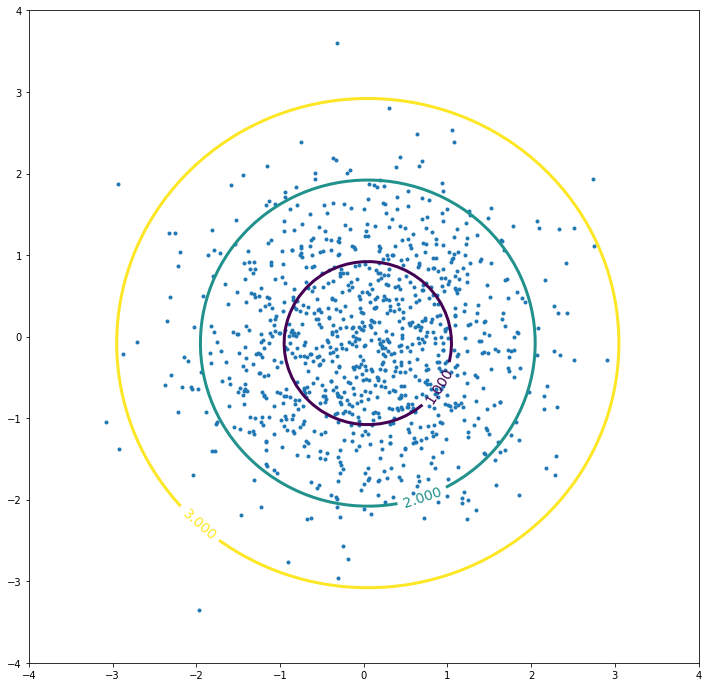

In [200]:
# part b

# calculate mean, eigenvalues, eigenvectors and transform matrix
mean0 = np.mean(Y[:,0])
mean1 = np.mean(Y[:,1])
eig_vals, eig_vecs = np.linalg.eig(covariance)
A = np.linalg.inv(covariance)

# circle centered at mean of data
xv = np.arange(-4, 4, 0.1)
yv = np.arange(-4, 4, 0.1)
x, y = np.meshgrid(xv, yv)
z = (x - mean0) ** 2 + (y - mean1) ** 2

# transform given point (x, y) using matrix A
def transform(x, y, A):
    data = np.array([x, y])
    z = np.sqrt(np.matmul(data.T, np.matmul(A, data))) # sqrt([x, y]*A*[x, y].T)
    return np.diag(z)

# manipulate circle to obtain standard deviation contour
gridsize = len(x)
zt = np.empty((gridsize, gridsize))
for i in range(gridsize):
    zt[i] = transform(x[i] - mean0, y[i] - mean1, A)

# from part a
fig, ax = plt.subplots(figsize=(12,12))
plt.scatter(Y[:,0], Y[:,1], marker='.')

# plot contour
cs = ax.contour(x, y, zt, levels=[1, 2, 3], linewidths=3)
ax.clabel(cs, inline=1, fontsize=14)

# plot formatting
xmin, ymin = -4, -4
xmax, ymax = 4, 4
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
plt.show()

## Question 1 - Covariance Matrix B

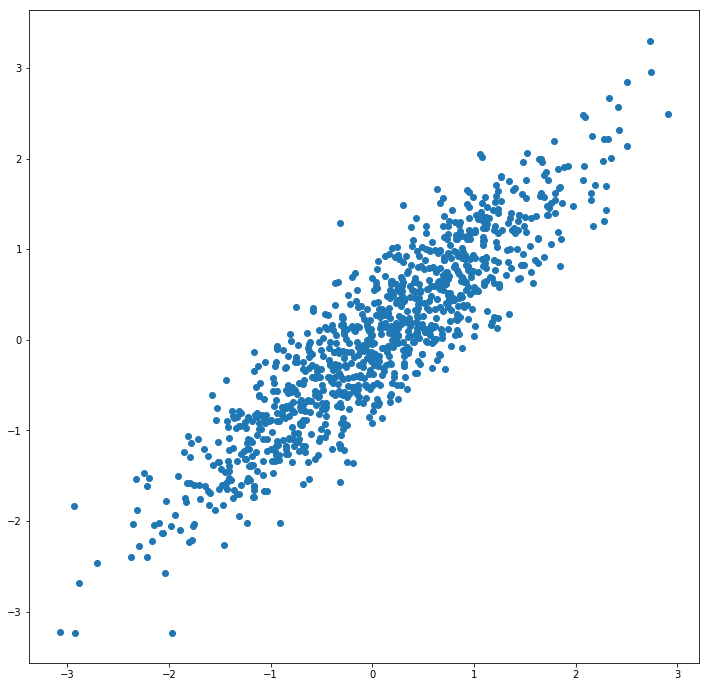

In [202]:
# part a
covariance = np.array([[1, 0.9],[0.9, 1]])
np.random.seed(2048)
Y = np.random.randn(n, d)
chol_cov = np.linalg.cholesky(covariance)
Y = np.matmul(Y, chol_cov.T)

fig = plt.figure(figsize=(12,12))
plt.scatter(Y[:,0], Y[:,1])
plt.show()

C:\Anaconda3\envs\syde675-asgmt\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in sqrt


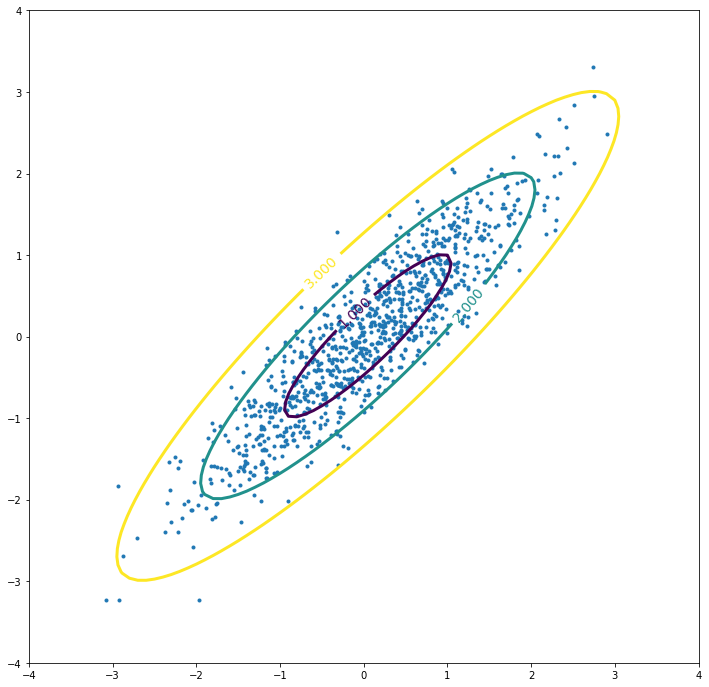

In [203]:
# part b

# calculate mean, eigenvalues, eigenvectors and transform matrix
mean0 = np.mean(Y[:,0])
mean1 = np.mean(Y[:,1])
eig_vals, eig_vecs = np.linalg.eig(covariance)
A = np.linalg.inv(covariance)

# circle centered at mean of data
xv = np.arange(-4, 4, 0.1)
yv = np.arange(-4, 4, 0.1)
x, y = np.meshgrid(xv, yv)
z = (x - mean0) ** 2 + (y - mean1) ** 2

# transform given point (x, y) using matrix A
def transform(x, y, A):
    data = np.array([x, y])
    z = np.sqrt(np.matmul(data.T, np.matmul(A, data))) # sqrt([x, y]*A*[x, y].T)
    return np.diag(z)

# manipulate circle to obtain standard deviation contour
gridsize = len(x)
zt = np.empty((gridsize, gridsize))
for i in range(gridsize):
    zt[i] = transform(x[i] - mean0, y[i] - mean1, A)

# from part a
fig, ax = plt.subplots(figsize=(12,12))
plt.scatter(Y[:,0], Y[:,1], marker='.')

# plot contour
cs = ax.contour(x, y, zt, levels=[1, 2, 3], linewidths=3)
ax.clabel(cs, inline=1, fontsize=14)

# plot formatting
xmin, ymin = -4, -4
xmax, ymax = 4, 4
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
plt.show()